### FYI
I saved my analysis report in a Word document called Lending Club Project Report because this jupyter notebook is a little disorganized. 

# Decision Trees Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

* not.fully.paid : This is the class atribute you will build a decision tree to predict

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [3]:
loans = pd.read_csv('loan_data.csv')

In [170]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Each row represents an entry for a loan: type, numerical descriptions, and one class, which tells us whether the loan is fully paid or not. 

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Summary Statistics About the Dataset

In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# EDA

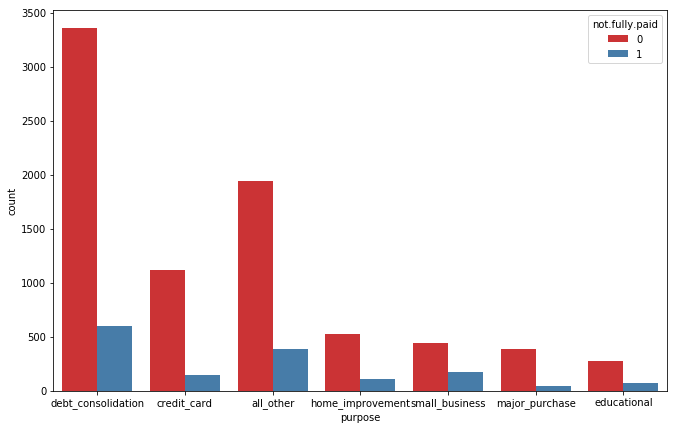

In [15]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

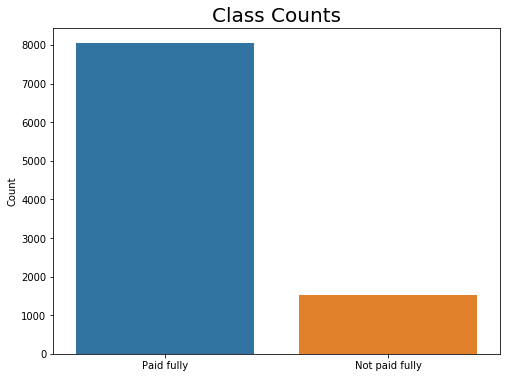

In [70]:
# Get number of loans that are paid fully and not paid fully
no = loans[loans["not.fully.paid"] == 1].shape[0]
yes = loans[loans["not.fully.paid"] == 0].shape[0]
plt.figure(figsize=(8, 6))
sns.countplot(loans["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class Counts", y=1, fontdict={"fontsize": 20});

In [73]:
print(f"Number of loans that are paid fully = {yes}")
print(f"Number of loans that are not paid fully = {no}")
print(f"Proportion of fully paid loans to loans not fully paid = {(no / yes) * 100:.2f}%")

Number of loans that are paid fully = 8045
Number of loans that are not paid fully = 1533
Proportion of fully paid loans to loans not fully paid = 19.06%


About 84% of the loans have been fully paid and 16% have not been paid fully.

## Histogram of fico

This histogram shows the joint distribution of values of fico and not.fully.paid attributes.  As we can see, there are a little over of 800 not fully paid loans when the borrower has a credit score of about 690. 

Text(0.5, 0, 'FICO')

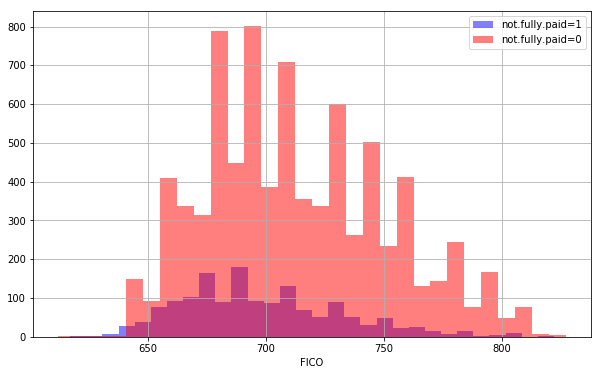

In [9]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

## Scatterplot of all pairs of attributes

**Create more visualizations and interperet the results in the first part of the report.** 
You can create a scatterplot of pairs of attributes like we did in class example but since there are more attributes here, it will take longer to create them and will be harder to analyze, but if you clcik on images you can zoom them...
Best solution is to create a subset of the dataset with some of the attributes and then create scatterplots. you can use what we used in class::

**this will take 1 minute to create graphs just wait until they show up. Agin this is not very practical, create a subset of attributes, and execute the following code on that new dataframe**

C:\Users\cstol\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\cstol\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cstol\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\cstol\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


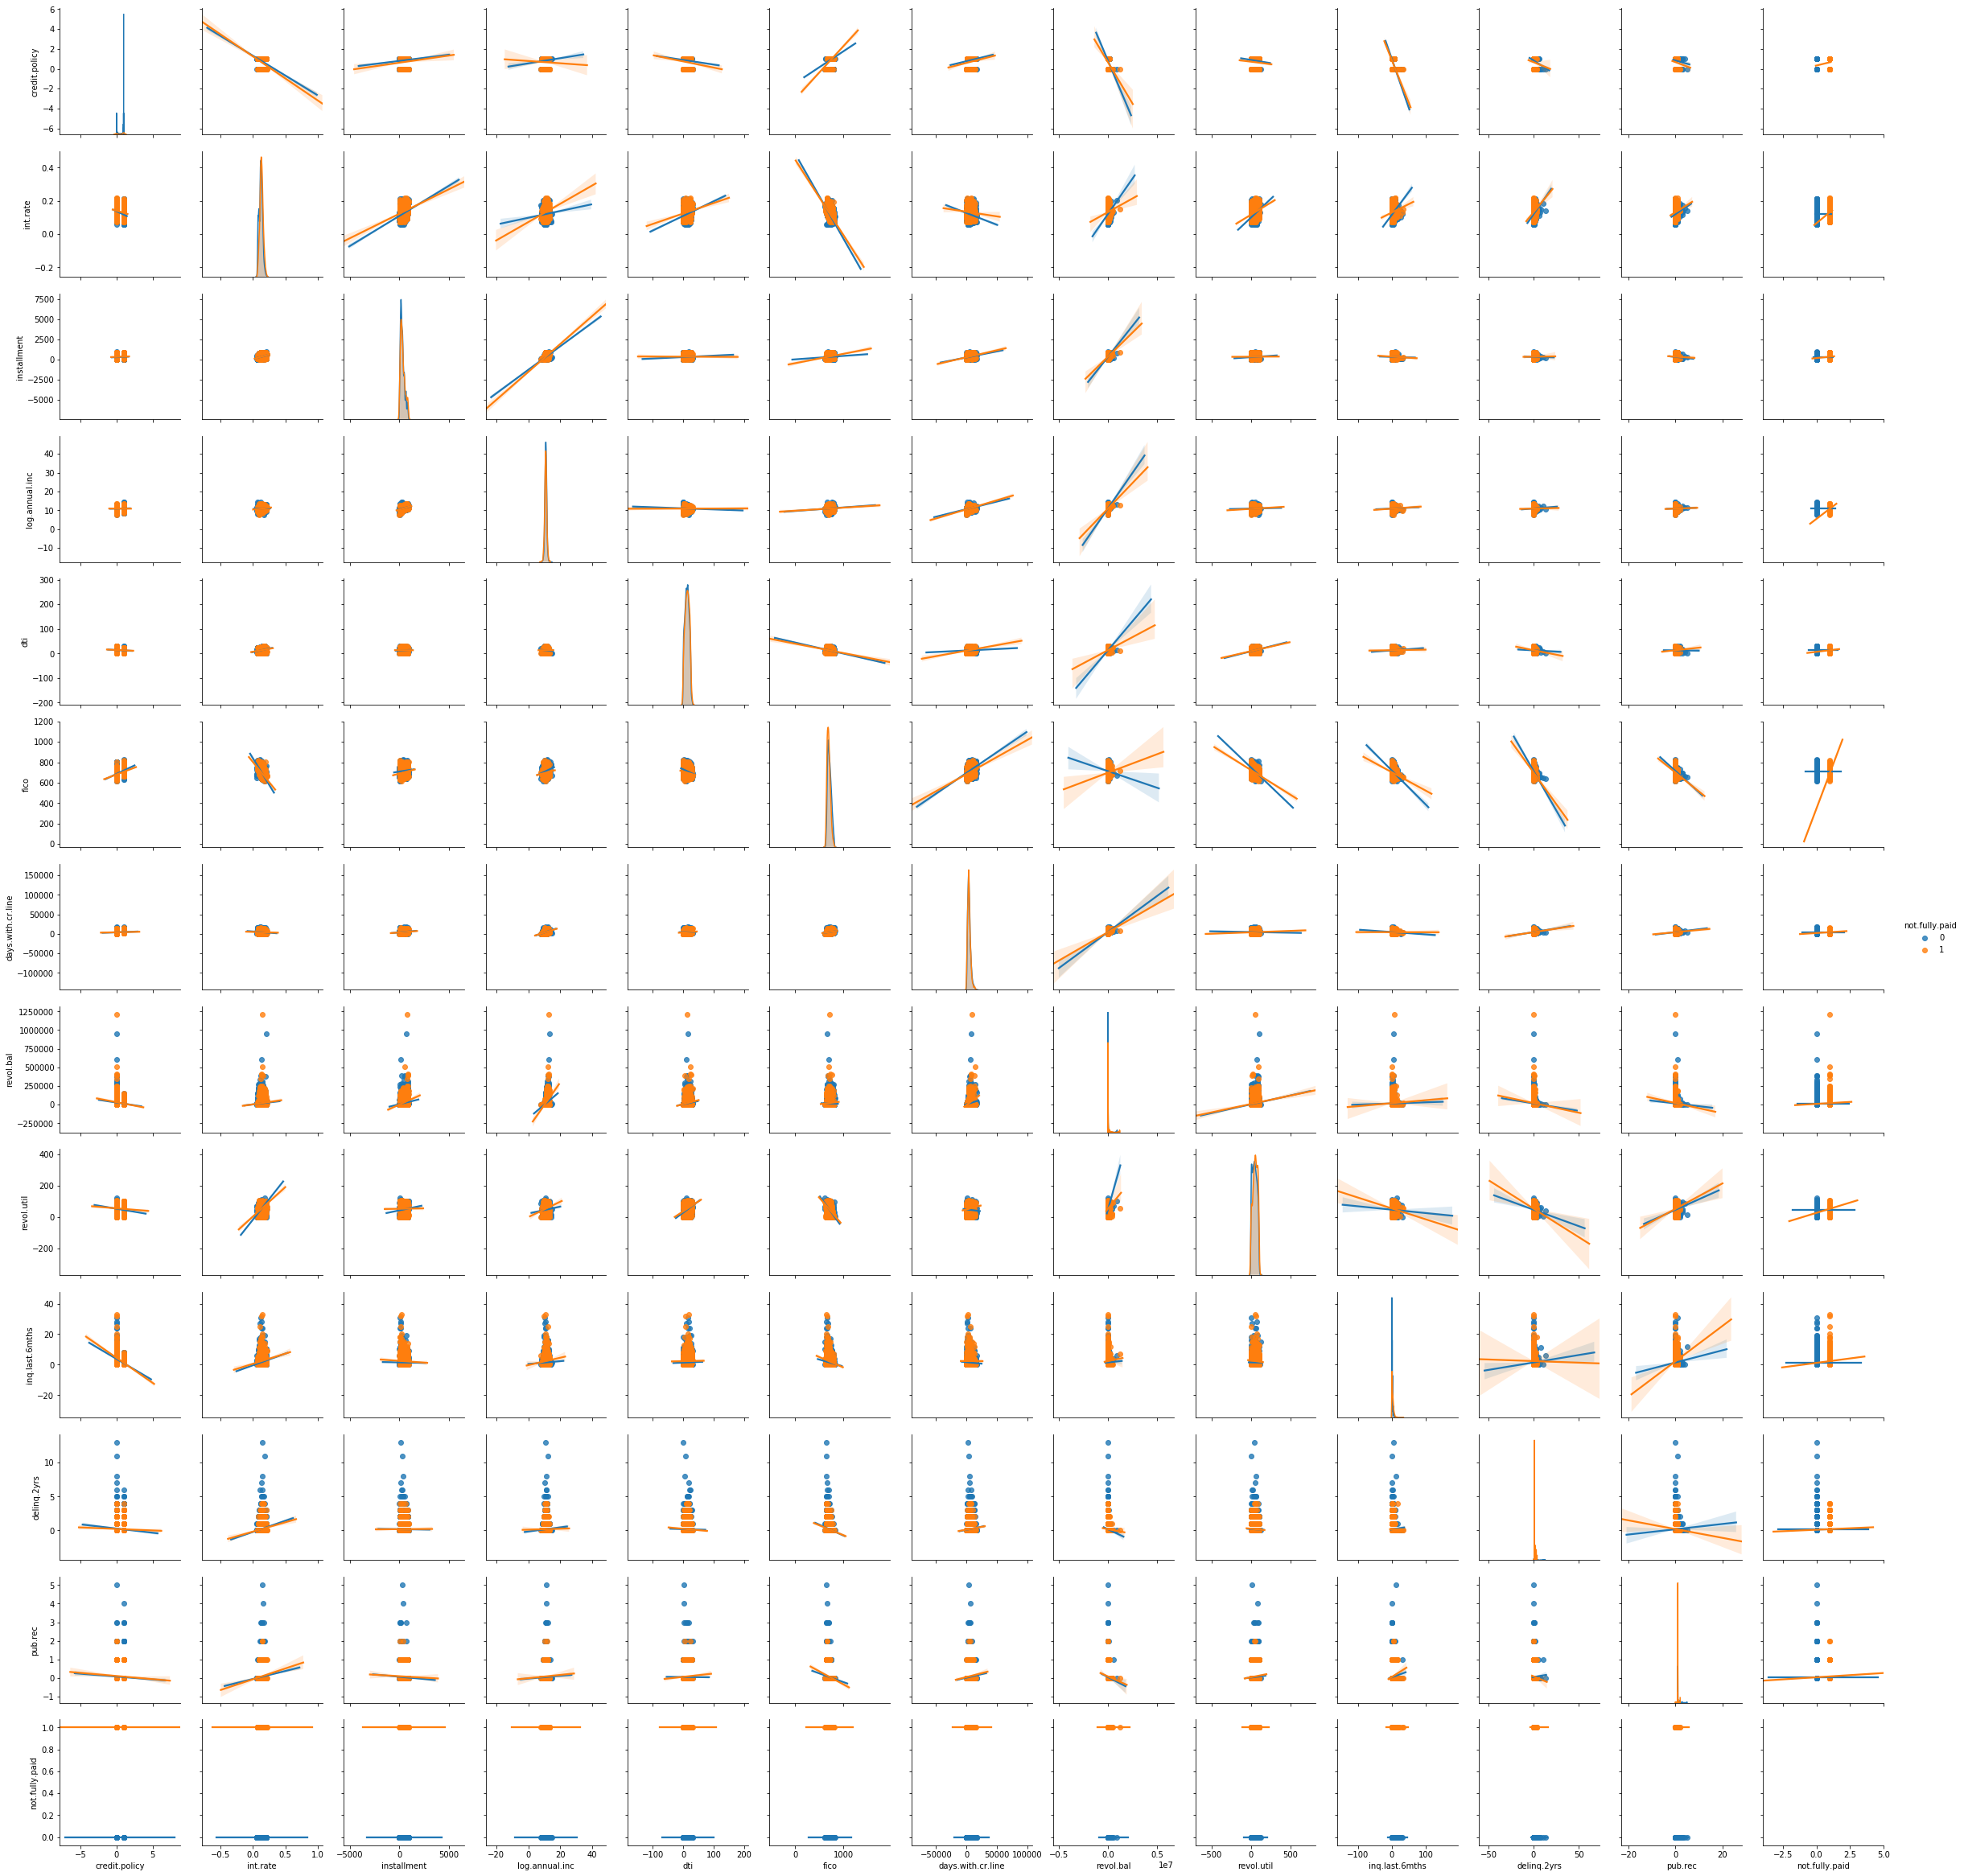

In [10]:
sns.pairplot(loans.dropna(), hue='not.fully.paid', kind="reg")

# Correlation Coefficient Matrix
This correlation coefficient matrix is displayed as a color-encoded matrix, which clarifies what attribute pairs have the strongest relationships and the weakest relationships. Focusing on the bottom half of the table, below the diagonal line of perfect ones, we can see that there are three strong negative correlations colored in black squares: credit.policy and inq.last.6mths at -0.54, fico and revol.util at -0.54, and int.rate and fico at 0.71.

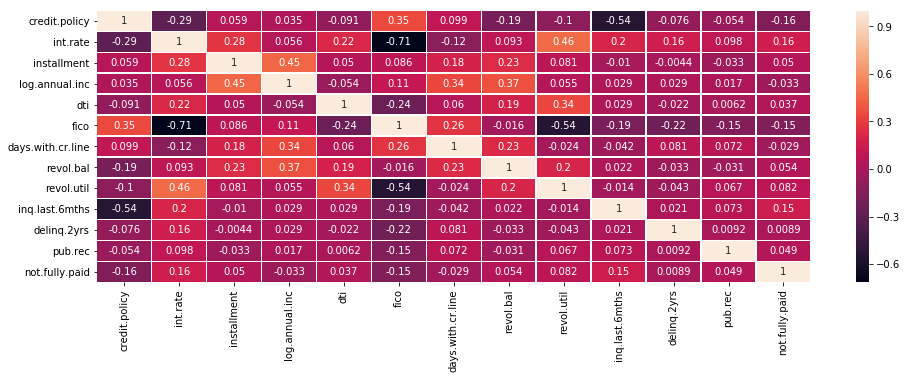

In [11]:
corr = loans.corr()

plt.figure(figsize = (16, 5))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5)

Although (credit.policy, inq.last.6mths), (int.rate, fico), and (fico, revol.util) have the highest correlations of all the total pairs of attributes, they are still not the best attributes to predict whether the borrower will pay off their loans.  Because we are building a decision tree based on ‘not.fully.paid’ attribute, this is the dependent variable and thus, we’ll be focusing its relationships with the attributes that it has the strongest with.  

## int.rate

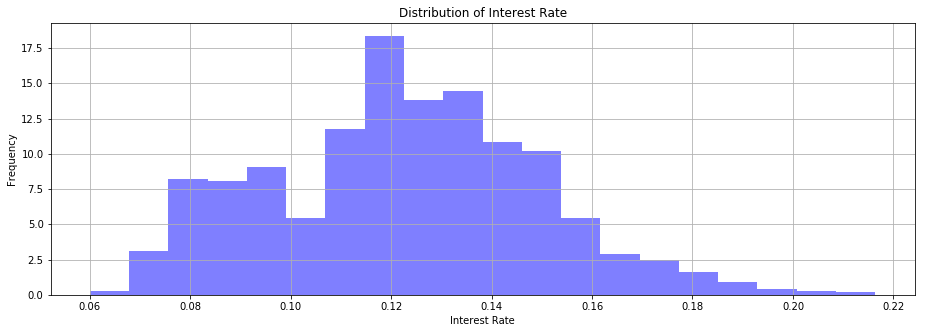

In [12]:
plt.figure(figsize=(16,5))
loans['int.rate'].hist(bins=20, density=1, facecolor='blue', alpha=0.5)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rate')

plt.subplots_adjust(left=0.15)

In [13]:
loans['int.rate'].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

Interest rates range from 6.00% to 21.64% with a mean of 12.26%. We can see that 25% of loans have interest rates lower than 10.39%, while 50% of all loans have interest rates between 10.39% and 14.07%.

### Relationship between not.fully.paid and int.rate

In [172]:
loans.groupby('not.fully.paid')['int.rate'].describe()

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,0.120770,0.026692,0.0600,0.0996,0.1218,0.1387,0.2121
1,1533.0,0.132452,0.025495,0.0705,0.1154,0.1316,0.1482,0.2164


C:\Users\cstol\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\cstol\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cstol\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\cstol\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


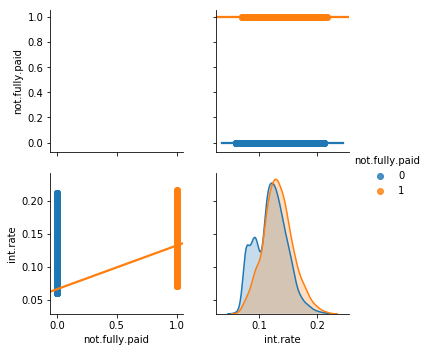

In [174]:
sns.pairplot(loans.dropna(), vars=['not.fully.paid', 'int.rate'], hue='not.fully.paid', kind="reg")

According to the summary statistics, not fully paid loans tend to have much higher interest rates than fully paid loans. 

## inq.last.6mths

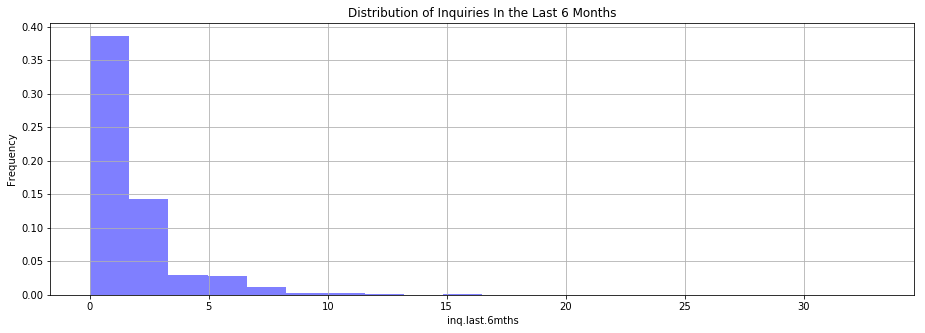

In [21]:
plt.figure(figsize=(16,5))
loans['inq.last.6mths'].hist(bins=20, density=1, facecolor='blue', alpha=0.5)
plt.xlabel('inq.last.6mths')
plt.ylabel('Frequency')
plt.title('Distribution of Inquiries In the Last 6 Months')

plt.subplots_adjust(left=0.15)

In [22]:
loans['inq.last.6mths'].describe()

count    9578.000000
mean        1.577469
std         2.200245
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        33.000000
Name: inq.last.6mths, dtype: float64

Inquiries in the last 6 months range from 0 to 33 inquiries. 

### Relationship between not.fully.paid and inq.last.6mths

In [157]:
loans.groupby('not.fully.paid')['inq.last.6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,1.433934,1.999009,0.0,0.0,1.0,2.0,31.0
1,1533.0,2.330724,2.933480,0.0,0.0,1.0,3.0,33.0


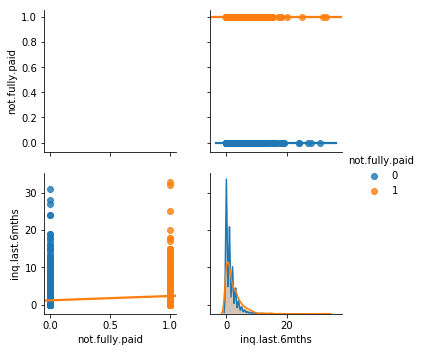

In [175]:
sns.pairplot(loans.dropna(), vars=['not.fully.paid', 'inq.last.6mths'], hue='not.fully.paid', kind="reg")

Not fully paid loans tend to have 0.9 more inquiries in the last 6 months.

### Relationships between not.fully.paid and installment

In [19]:
loans.groupby('not.fully.paid')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,314.574123,203.398688,15.67,162.25,266.52,423.95,940.14
1,1533.0,342.785114,223.948527,15.91,168.64,287.31,491.30,926.83


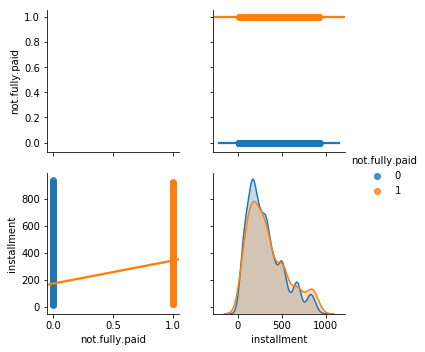

In [176]:
sns.pairplot(loans.dropna(), vars=['not.fully.paid', 'installment'], hue='not.fully.paid', kind="reg")

On average, loans that are not fully paid have \\$28 higher installments than fully paid loans.

In [156]:
loans.groupby('not.fully.paid')['revol.util'].describe()

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,45.759608,28.891285,0.0,21.4,44.8,69.8,119.0
1,1533.0,52.255075,29.057906,0.0,29.9,53.9,77.0,106.5


## Loans by Purpose

In [48]:
loans.groupby('purpose')['not.fully.paid'].value_counts(normalize=True).sort_values()

purpose             not.fully.paid
major_purchase      1                 0.112128
credit_card         1                 0.115689
debt_consolidation  1                 0.152388
all_other           1                 0.166023
home_improvement    1                 0.170111
educational         1                 0.201166
small_business      1                 0.277868
                    0                 0.722132
educational         0                 0.798834
home_improvement    0                 0.829889
all_other           0                 0.833977
debt_consolidation  0                 0.847612
credit_card         0                 0.884311
major_purchase      0                 0.887872
Name: not.fully.paid, dtype: float64

Only 11% of not fully paid loans are major_purpose, but 99% of fully paid loans are also major_purchase.

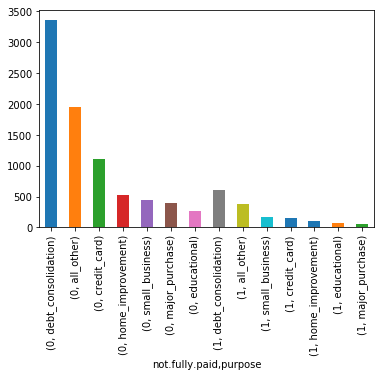

In [29]:
loans.groupby('not.fully.paid')['purpose'].value_counts().plot(kind='bar')

More than half of the loans are debt consolidation.

### *****FIRST PART OF YOUR REPORT. ANALYSE AND DISCUSS THESE SUMAARY STATISTICS and THESE GRAPHS.****
### What do they tell you about your data? About the relationship of the attributes, etc..

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [49]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [50]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [51]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

**if you call head() now you will see that pandas created dummy variables called 
purpose_credit_card	purpose_debt_consolidation	purpose_educational, tc..**

In [52]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [53]:
final_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past. Do not forget you class attribute is "not.fully.paid" **


In [180]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [129]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [105]:
dtree = DecisionTreeClassifier()

In [106]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [107]:
predictions = dtree.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2416
           1       0.23      0.25      0.24       458

   micro avg       0.75      0.75      0.75      2874
   macro avg       0.54      0.55      0.55      2874
weighted avg       0.76      0.75      0.75      2874



In [64]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.7470424495476687


The classifier's accuracy is 0.747.  The misclassification rate, also known as "error rate" is 0.26553981.

In [62]:
print(confusion_matrix(y_test, predictions))

[[2031  385]
 [ 342  116]]


When the classifier is actually "not fully paid", the recall (how often does it predict "not fully paid") is 0.25317511. When the classifier is actually "fully paid", the false positive rate (how often does it predict "not fully paid"), is 0.13395964.  When it's actually "fully paid", the true negative rate (how often does it predict "fully paid") is 0.83119038.  When it predicts "not fully paid", its precision is 0.23.  

[[2031  385]
 [ 342  116]]


NameError: name 'labels' is not defined

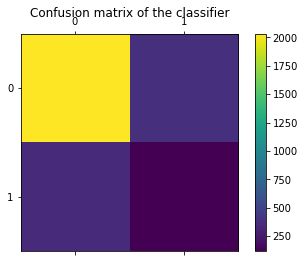

In [75]:
cm = confusion_matrix(y_test, predictions, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

From this confustion matrix, there are two possible predicted classes: '0' (fully paid) and '1' (not fully paid).  The classifier made a total of 2,874 predictions. Out of those 2,874 cases, the classifier predicit '0' 2,373 times and '1' 501 times.  In reality, 2,416 loans are fully paid, and 458 loans are not fully paid. Recall that in our original data, the proportion of fully paid loans to loans not fully paid = 19.06%.  Now from this confustion matrix, the proportion of fully paid loans to loans not fully paid = 18.96%.

## Tree Visualization 

Visualize the decision tree just like we did in class.

In [188]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(final_data.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

## Improve your results

Using different values for the parameters come with DecisionTreeClassifier() method, try to improve your results..

### *****SECOND PART OF YOUR REPORT: ANALYSE AND DISCUSS THESE HOW YOU IMPROVED YOUR RESULTS, WHAT HELPED AND WHY?****

### Decision Trees Based On Purpose

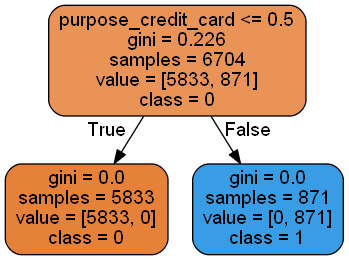

In [200]:
X = final_data.drop('not.fully.paid', axis = 1)
test_credit_card = final_data['purpose_credit_card']
X_train, X_test, y_train, y_test = train_test_split(X, test_credit_card, test_size=0.30)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, max_depth=None, class_names=['0','1'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

There are 6,704 credit card loan samples: 5,833 are fully paid and 877 are not fully paid.  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2483
           1       1.00      1.00      1.00       391

   micro avg       1.00      1.00      1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874

Accuracy Score:  1.0
[[2483    0]
 [   0  391]]


NameError: name 'labels' is not defined

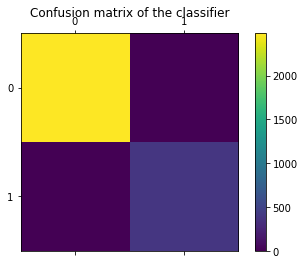

In [201]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [196]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['purpose_debt_consolidation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

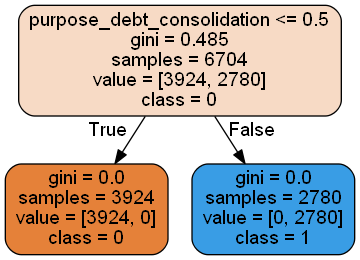

In [197]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, max_depth=None, class_names=['0','1'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
#graph[0].write_png("graph2.png")

There are 6,704 debt consolidation loan samples: 3,938 are fully paid and 2,766 are not fully paid.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1697
           1       1.00      1.00      1.00      1177

   micro avg       1.00      1.00      1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874

Accuracy Score:  1.0
[[1697    0]
 [   0 1177]]


NameError: name 'labels' is not defined

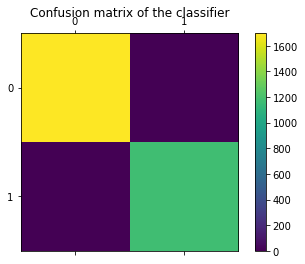

In [198]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

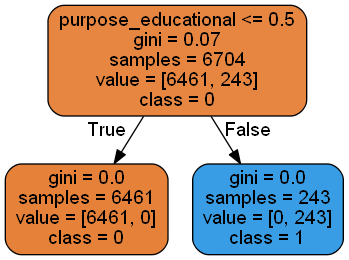

In [203]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['purpose_educational']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, max_depth=3, class_names=['0','1'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
#graph[0].write_png("graph2.png")

There are 6,704 educational loan samples, 6,450 are fully paid and 254 are not fully paid.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2774
           1       1.00      1.00      1.00       100

   micro avg       1.00      1.00      1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874

Accuracy Score:  1.0
[[2774    0]
 [   0  100]]


NameError: name 'labels' is not defined

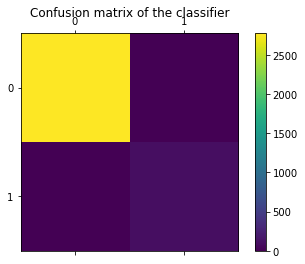

In [204]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

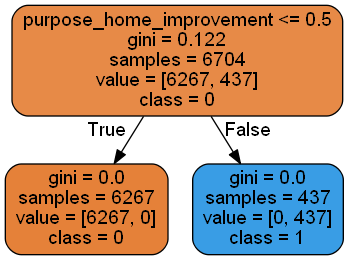

In [205]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['purpose_home_improvement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, max_depth=3, class_names=['0','1'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

There are 6,704 home improvement loan samples: 6,263 are fully paid and 441 are not fully paid.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2682
           1       1.00      1.00      1.00       192

   micro avg       1.00      1.00      1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874

Accuracy Score:  1.0
[[2682    0]
 [   0  192]]


NameError: name 'labels' is not defined

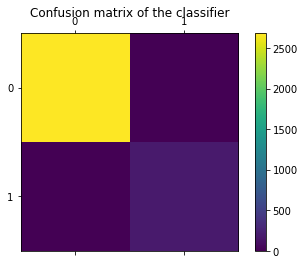

In [206]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

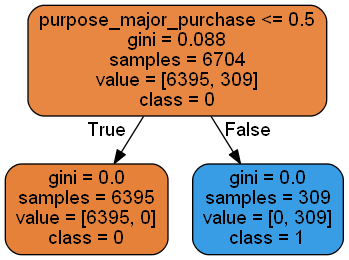

In [207]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['purpose_major_purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, max_depth=3, class_names=['0','1'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
#graph[0].write_png("graph2.png")

There are 6,704 major purchase loan samples: 6,400 are fully paid and 304 are not fully paid.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2746
           1       1.00      1.00      1.00       128

   micro avg       1.00      1.00      1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874

Accuracy Score:  1.0
[[2746    0]
 [   0  128]]


NameError: name 'labels' is not defined

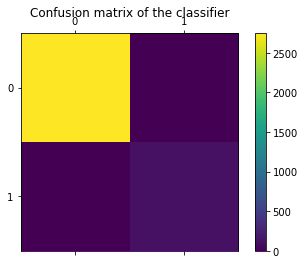

In [208]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

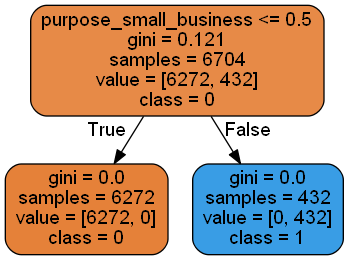

In [209]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['purpose_small_business']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, max_depth=3, class_names=['0','1'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

There are 6,704 small business loans: 6,275 are fully paid and 429 are not fully paid.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2687
           1       1.00      1.00      1.00       187

   micro avg       1.00      1.00      1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874

Accuracy Score:  1.0
[[2687    0]
 [   0  187]]


NameError: name 'labels' is not defined

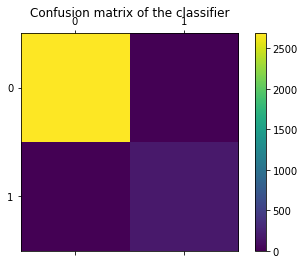

In [210]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=[0,1])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Decision Tree With Interest Rate

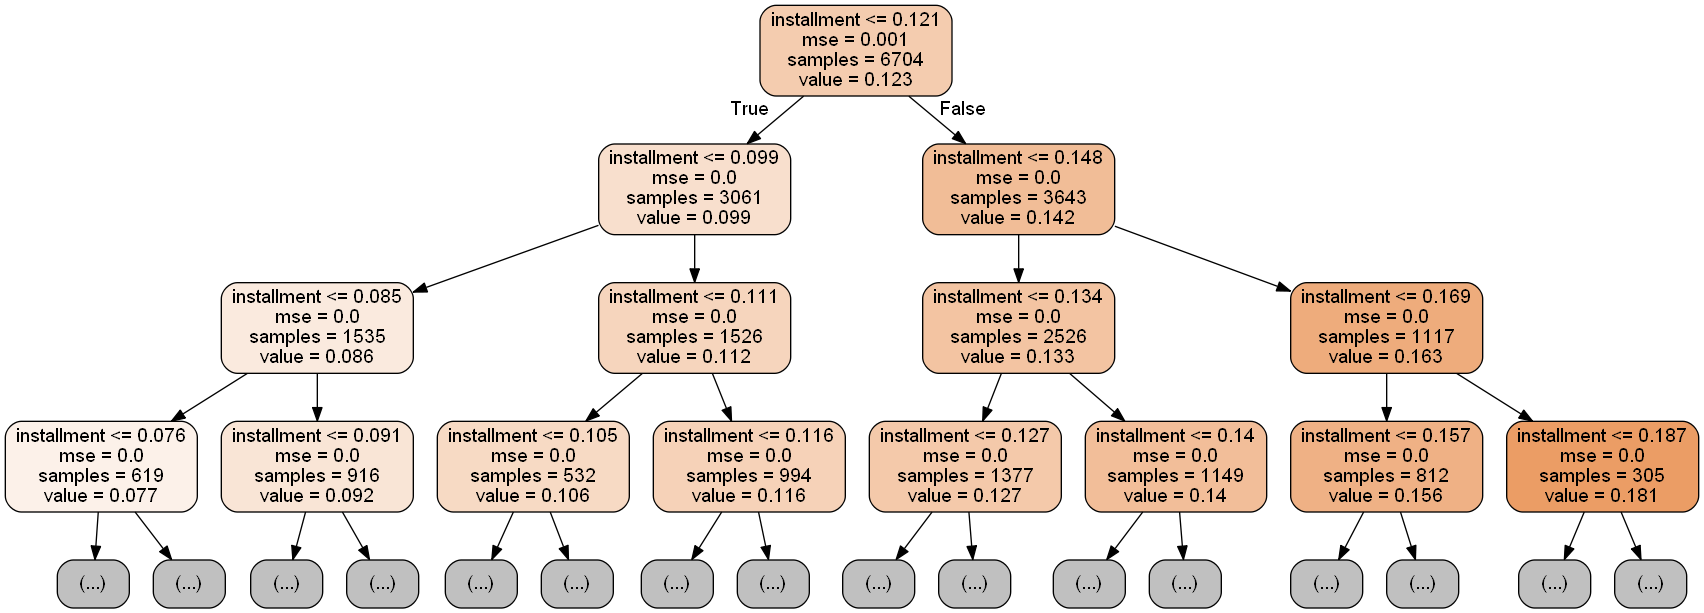

In [211]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['int.rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True, max_depth=3, class_names=['0','1'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Since 'not.fully.paid' has the strongest positive correlation with 'int.rate', I thought this will help me determine whether the borrower will pay back his/her loans or not.  However, interest rate is a continuous attribute with floating point values, so the DecisionTreeRegressor() method had to be used and the decision tree definitely lost information when it was categorizing the attributes in different class labels.  I even hardcoded for the class labels to show up, but the leaf nodes still did not show the class labels like the DecisionTreeClassifier did.  Therefore, I did not continue to make decision trees for the rest of the attributes.  

# Conclusion

In this part, I have learned the overall process of Data Mining to predict whether or not the borrower will pay off a loan.  After training and building decision trees based on purpose, I found that these models provided a somewhat informed prediction of the probability that a loan will be fully paid.  Looking at all the decision trees, there are more fully paid loans than not fully paid loans.  According to the Correlation Coefficient matrix, the most important attributes for predicting not fully paid are interest rate and inquiry in the last 6 months. 
